In [10]:
import os
import os.path
import random
import numpy as np

import torch.utils.data as data
from PIL import Image

def default_loader(filepath):
    return Image.open(filepath).convert('RGB')

class Reader(data.Dataset):
    def __init__(self, image_list, labels_list=[], edge_list=[], transform=None, target_transform=None, use_cache=True, loader=default_loader):
        
        self.images = image_list
        self.loader = loader
        
        if len(labels_list) is not 0:
            assert len(image_list) == len(labels_list)
            self.labels = labels_list
            self.edges = edge_list
        else:
            self.labels = False
            self.edges = False

        self.transform = transform
        self.target_transform = target_transform

        self.cache = {}
        self.use_cache = use_cache

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if idx not in self.cache:           
            img = self.loader(self.images[idx])
            if self.labels:
                target = Image.open(self.labels[idx])
                edge = Image.open(self.edges[idx])
            else:
                target = None
        else:
            img,target,edge = self.cache[idx]
            
        if self.use_cache:
            self.cache[idx] = (img, target, edge)

        seed = np.random.randint(2147483647)
        random.seed(seed)
        
        if self.transform is not None:
            img = self.transform(img)

        random.seed(seed)
        if self.labels:
            if self.target_transform is not None:
                target = self.target_transform(target)

        random.seed(seed)
        if self.edges:
            if self.target_transform is not None:
                edge = self.target_transform(edge)
            
        return np.array(img), np.array(target), np.array(edge)

In [11]:
from os import listdir
from os.path import join

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import transforms
from torch.utils.data import DataLoader 

basepath = 'E:/CVPPP2017_LSC_training/images/A1'
labels = sorted([join(basepath, f) for f in listdir(basepath) if f.endswith('_label.png')])

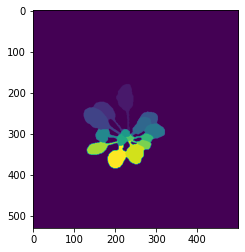

In [12]:
import matplotlib.pyplot as plt

img = labels[0]
num_array = np.array(Image.open(img)).astype(np.float32)  # 원본 label (instance segmentation용)
plt.imshow(num_array)
plt.show()

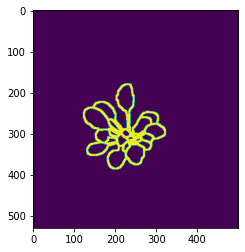

In [14]:
import cv2   

nap = np.zeros_like(num_array)
dIdx = abs(num_array[:-1,:]-num_array[1: ,:])>0
dIdy = abs(num_array[:,:-1]-num_array[: ,1:])>0
nap[1:]+=dIdx
nap[:,1:]+=dIdy
nap = np.clip(nap,0,1)
nap = cv2.dilate(nap, np.ones((5, 5))).astype('uint8')  # 윤곽선 굵기
plt.imshow(nap)
plt.show()

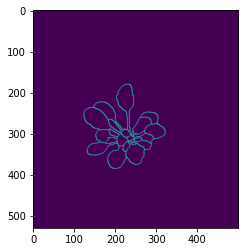

In [17]:
import cv2   

nap = np.zeros_like(num_array)
dIdx = abs(num_array[:-1,:]-num_array[1: ,:])>0
dIdy = abs(num_array[:,:-1]-num_array[: ,1:])>0
nap[1:]+=dIdx
nap[:,1:]+=dIdy
nap = np.clip(nap,0,1)
nap = cv2.dilate(nap, np.ones((1, 1))).astype('uint8')
plt.imshow(nap)
plt.show()

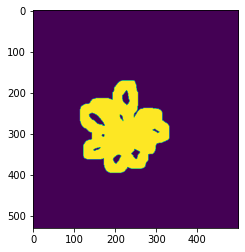

In [16]:
import cv2   

nap = np.zeros_like(num_array)
dIdx = abs(num_array[:-1,:]-num_array[1: ,:])>0
dIdy = abs(num_array[:,:-1]-num_array[: ,1:])>0
nap[1:]+=dIdx
nap[:,1:]+=dIdy
nap = np.clip(nap,0,1)
nap = cv2.dilate(nap, np.ones((20, 20))).astype('uint8')
plt.imshow(nap)
plt.show()

In [19]:
from PIL import Image

im = Image.fromarray(nap*255)  # boosting (안하면 저장 제대로 안됨)
im.save("sample.png")

In [20]:
for l in labels:
    num_array = np.array(Image.open(l)).astype(np.float32)
    nap = np.zeros_like(num_array)
    dIdx = abs(num_array[:-1,:]-num_array[1: ,:])>0
    dIdy = abs(num_array[:,:-1]-num_array[: ,1:])>0
    nap[1:]+=dIdx
    nap[:,1:]+=dIdy
    nap = np.clip(nap,0,1)
    nap = cv2.dilate(nap,np.ones((5, 5))).astype('uint8')
    pil = Image.fromarray(nap*255)
    pil.save(l[:-9]+"edge.png","PNG")